In [19]:
import os, sys, imp
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.manifold import TSNE
from sklearn.inspection import DecisionBoundaryDisplay


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
import datasets as D
imp.reload(D)

import utils as U
imp.reload(U)

import numpy as np

### Load dataset

In [20]:
(X_train, y_train), (X_test, y_test) = D.load_mnist_data()

In [25]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

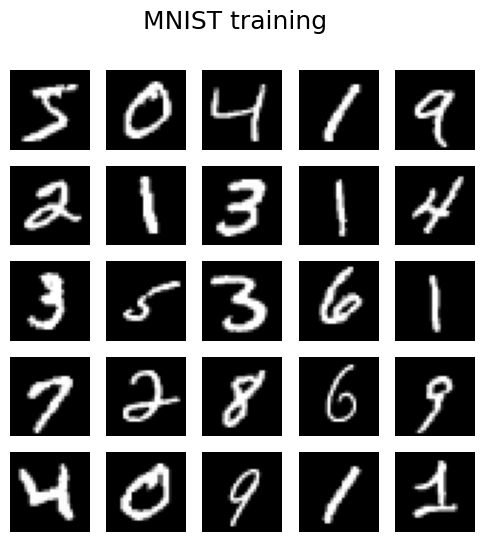

In [21]:
# Visualize training samples
U.visualize_dataset(X_train, title="MNIST training", n_samples=25)

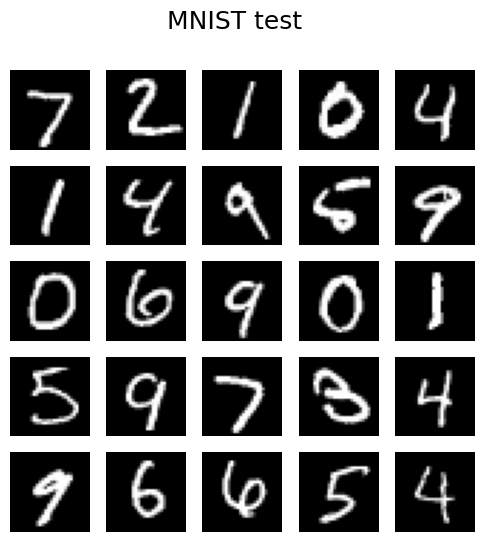

In [22]:
# Visualize training samples
U.visualize_dataset(X_test, title="MNIST test", n_samples=25)

### Preprocessing

In [26]:
# Flatten the images
X_train_vec = np.reshape(X_train, (X_train.shape[0], -1)).astype(np.float32)
X_test_vec = np.reshape(X_test, (X_test.shape[0], -1)).astype(np.float32)

# Normalize
X_train_vec /= 255.0
X_test_vec /= 255.0

#### 2D projection

In [27]:
proj2d = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3)

ns = 1000
X_train_emb = proj2d.fit_transform(X_train_vec[:ns])
X_test_emb = proj2d.fit_transform(X_test_vec[:ns])

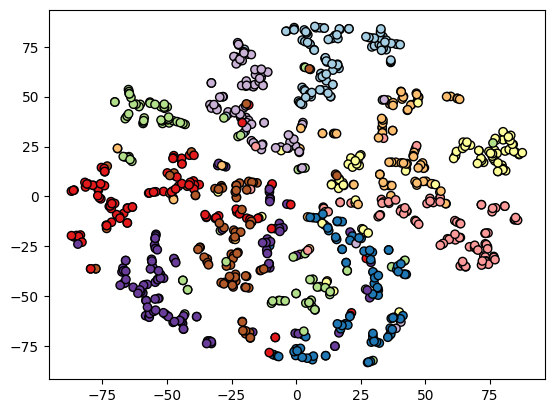

In [28]:
# plot the projection
plt.scatter(X_train_emb[:, 0], X_train_emb[:, 1], c=y_train[:ns], cmap=plt.cm.Paired, edgecolors="k")

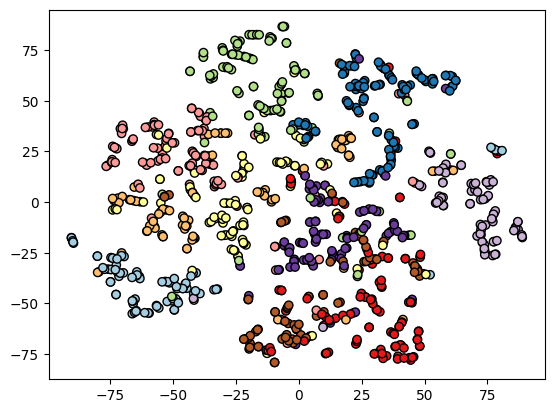

In [29]:
# plot the projection
plt.scatter(X_test_emb[:, 0], X_test_emb[:, 1], c=y_test[:ns], cmap=plt.cm.Paired, edgecolors="k")

### Train model

In [30]:
# Fit the model and get the separating hyperplane
clf = svm.SVC(kernel="linear", C=1.0)
# clf = svm.SVC(kernel="rbf")

ns = 10000
clf.fit(X_train_vec[:ns], y_train[:ns])

SVC(kernel='linear')

### Prediction

In [32]:
y_train_hat = clf.predict(X_train_vec[:ns])
y_test_hat = clf.predict(X_test_vec)

In [33]:
def accuracy(y, y_hat):
    """
    Args:
        y:
        y_hat:
    """
    acc = np.sum(y == y_hat) / len(y)
    return acc

In [34]:
train_acc = accuracy(y_train[:ns], y_train_hat[:ns]) * 100.
test_acc = accuracy(y_test, y_test_hat) * 100.

In [36]:
print(f"Training accuracy: {train_acc:.2f}%")
print(f"Test accuracy: {test_acc:.2f}%")

Training accuracy: 99.69%
Test accuracy: 91.70%
